## Dominant Colours in a Frame

Using  the K-Means Algorithm with 10 different clusters, the most dominant colours are extracted from specified movie stills. 10 clusters are used since the script `ColourBarcode.ipynb` also makes use of the K-Means Algorithm with 10 clusters. This is an illustration of how the **'colour barcode'** is constructed using the most dominant colour from each frame of the movie, where each frame corresponds to **one second** of the movie 

- Reference: https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv

In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

In [2]:
# Change working directory 
import os 
os.chdir('/Users/nmfamily/Desktop')
os.getcwd() 

'/Users/nmfamily/Desktop'

1) Define function to plot most dominant colours in a movie still

In [3]:
def visualize_col(cluster, centroids):
    
    # Obtain number of clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rectangle and iterate through each cluster's colour and corresponding %
    rect = np.zeros((50, 300, 3), dtype = np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

2) Process and display specified movie still 

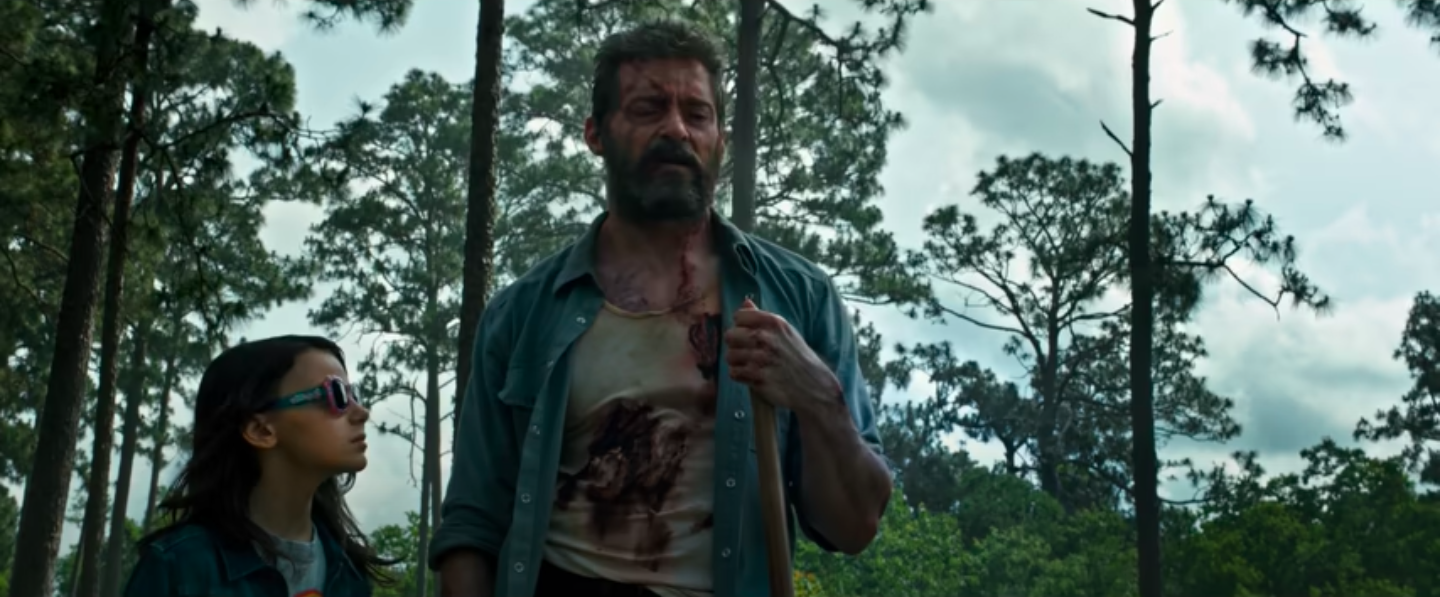

In [4]:
# Specify path to movie still and display still
still_path = Path("Logan_2017_1.png")
still = Image.open(still_path.open("rb"))
still

3) Convert movie still to a list of pixels and reshape

In [5]:
# Load image and convert to a list of pixels
image = cv2.imread('Logan_2017_1.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

3 ) Display most dominant colours in movie still

In [6]:
# Find and display most dominant colors
cluster = KMeans(n_clusters = 10).fit(reshape)
visualize = visualize_col(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2.imshow('visualize', visualize)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

[129.91129518 157.61008152 153.7736769 ] 4.41%
[ 97.21178468 121.48988114 116.33286678] 5.05%
[163.42902023 192.82191185 189.53212589] 6.11%
[69.7148669  91.11349585 83.98926867] 7.21%
[190.93503754 217.59878073 214.71457485] 9.46%
[ 7.39040993 14.08031859 11.52078582] 10.00%
[214.14837825 232.46354437 231.39165126] 11.28%
[51.58458761 68.56495193 58.75323543] 11.49%
[34.51756207 50.31664859 40.63250724] 16.29%
[19.64787268 32.92418094 26.3579653 ] 18.71%


4) Replicate for two additional movie stills

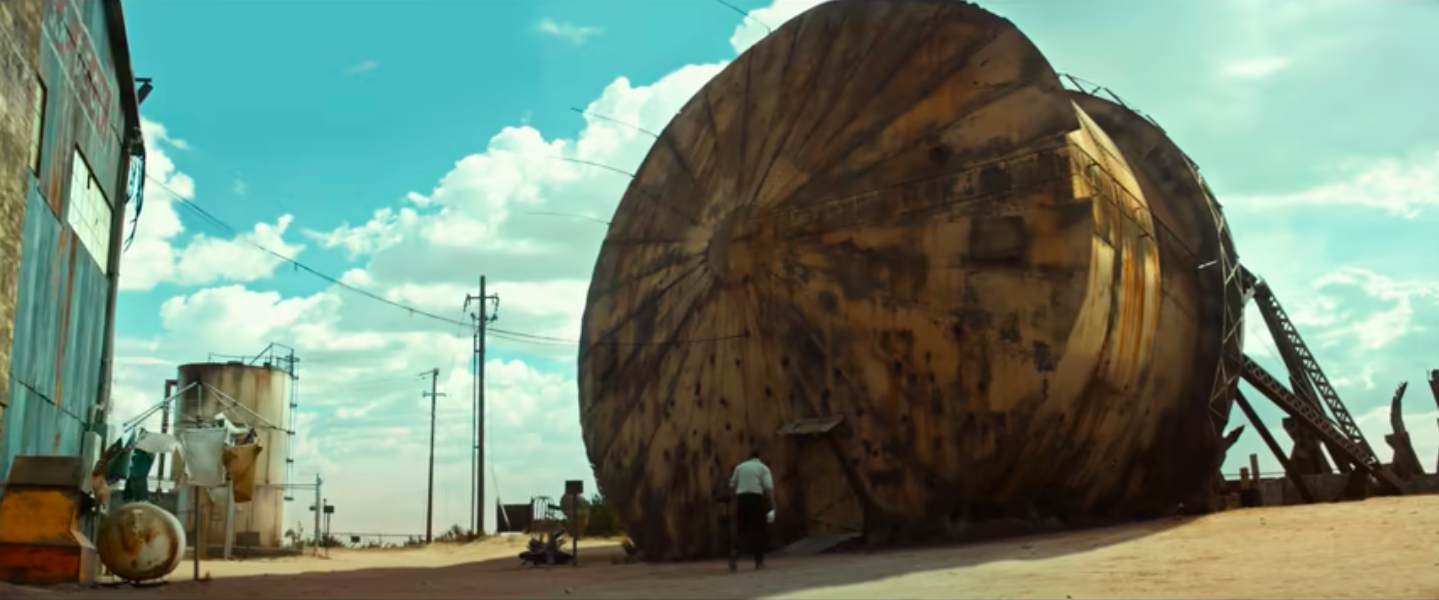

In [7]:
still_path = Path("Logan_2017_2.png")
still = Image.open(still_path.open("rb"))
still

In [8]:
# Load image and convert to a list of pixels
image = cv2.imread('Logan_2017_2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters = 10).fit(reshape)
visualize = visualize_col(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2.imshow('visualize', visualize)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

[105.03306426 136.75826606 117.56327815] 5.09%
[108.72360829 101.31499855  70.81933663] 5.59%
[186.28015255 170.92296409 120.10497524] 6.72%
[225.33148715 248.57953212 230.72937092] 6.94%
[190.90135792 233.70941193 213.76147816] 10.49%
[32.21810976 21.55315384 13.4947436 ] 11.17%
[167.82135574 219.38547653 200.85867886] 11.46%
[ 77.65300923 193.71819926 197.51531591] 11.60%
[83.62295812 64.73114927 41.45057223] 12.76%
[57.62986748 42.75762185 27.96340237] 18.18%


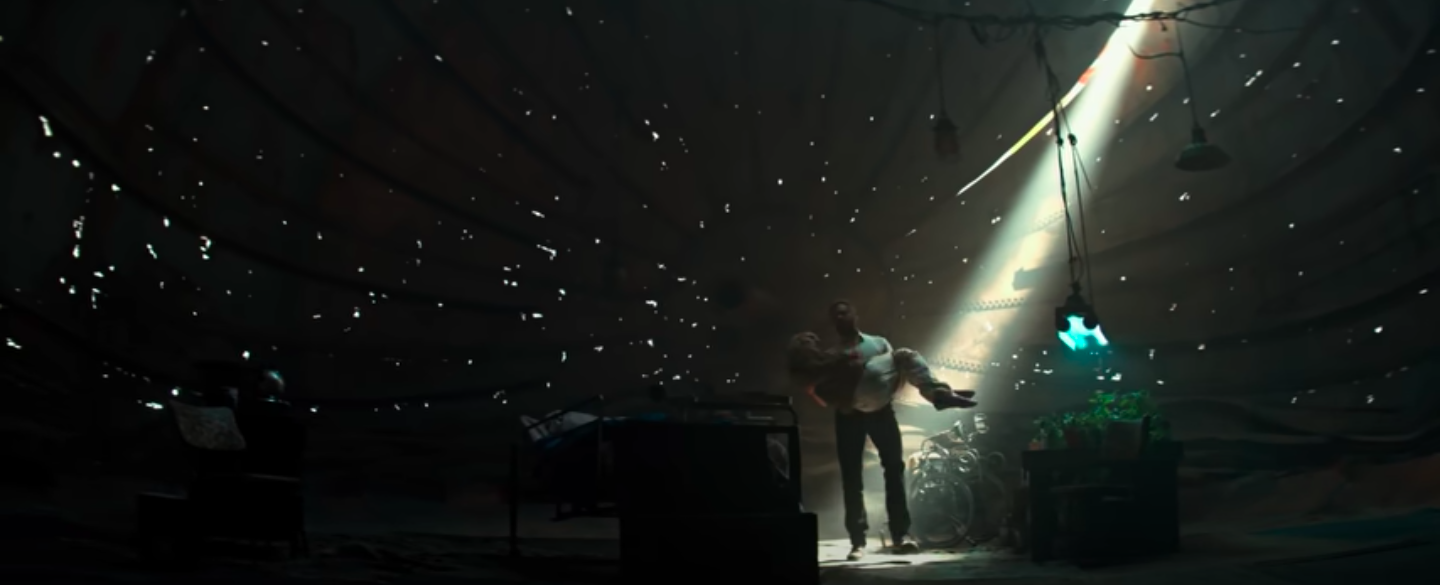

In [9]:
still_path = Path("Logan_2017_3.png")
still = Image.open(still_path.open("rb"))
still

In [10]:
# Load image and convert to a list of pixels
image = cv2.imread('Logan_2017_3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters = 10).fit(reshape)
visualize = visualize_col(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
cv2.imshow('visualize', visualize)
cv2.destroyAllWindows()
for i in range (1,5):
    cv2.waitKey(1)

[194.78518675 204.57501583 177.80227896] 1.13%
[234.65368594 241.04727308 214.34437663] 1.23%
[145.87915691 162.21030445 141.12224824] 1.27%
[107.99415746 116.00684004 100.68029925] 1.67%
[70.78618191 78.26654155 67.47507856] 2.72%
[47.6124038  55.08155577 47.52785203] 6.62%
[32.47826794 37.62409026 32.93254727] 11.68%
[21.08888757 24.46896284 22.35077452] 22.05%
[4.12259966 4.83889764 4.85999241] 24.41%
[12.24412824 14.72333149 14.01067394] 27.25%
